# 时间序列处理
## datatime数据转换
- Python内置datetime模块提供了各种日期和时间对象。
- Pandas可以将datatime对象转换为Timestamp时间戳对象便于进一步处理
- Timeseries以及创建了大量用于操作时间序列数据的新功能。

In [3]:
import pandas as pd
import datetime
import numpy as np

# 将datetime转换为Timestamp对象
timestamp = pd.to_datetime('20220128')
print(timestamp)
# pd.to_datetime可以接受不同类型的datetime对象
# 多个不同来源的datetime对象将被将被转换为DatetimeIndex类
Date_Index = pd.to_datetime(
    ['20220125', '20220126', np.datetime64('2022-02-25'), datetime.datetime(2022, 2, 26)])
print(Date_Index)

2022-01-28 00:00:00
DatetimeIndex(['2022-01-25', '2022-01-26', '2022-02-25', '2022-02-26'], dtype='datetime64[ns]', freq=None)


- 创建以时间戳为索引的DataFrame/Series对象

In [5]:
data_dataframe = pd.DataFrame([[5, 3], [10, 5], [15, 7], [20, 9]], index=Date_Index)  # 设置时间索引
print(data_dataframe)
print('-------')
data_series = pd.Series([5, 10, 15, 20], index=Date_Index)
print(data_series)

             0  1
2022-01-25   5  3
2022-01-26  10  5
2022-02-25  15  7
2022-02-26  20  9
-------
2022-01-25     5
2022-01-26    10
2022-02-25    15
2022-02-26    20
dtype: int64


## 时间序列索引
### 位置索引

In [16]:
print(data_dataframe.iloc[2,:])  # value（左侧的是索引）

print('-'*20)
print(data_series.iloc[2])

0    15
1     7
Name: 2022-02-25 00:00:00, dtype: int64
15
7
--------------------
15


### 时间戳(index)索引
- 符合被解析的日期格式可以直接输入

In [11]:
print(data_dataframe.loc['2022-01-25'])

0    5
1    3
Name: 2022-01-25 00:00:00, dtype: int64


In [12]:
print(data_dataframe.loc['20220125'])

0    5
1    3
Name: 2022-01-25 00:00:00, dtype: int64


In [13]:
print(data_dataframe.loc['2022.01.25'])

0    5
1    3
Name: 2022-01-25 00:00:00, dtype: int64


In [14]:
print(data_dataframe.loc['2022/01/25'])

0    5
1    3
Name: 2022-01-25 00:00:00, dtype: int64


In [15]:
print(data_series['20220125'])

5


- 可以用指定年或月份操作索引数据

In [17]:
print(data_dataframe.loc['2022'])

             0  1
2022-01-25   5  3
2022-01-26  10  5
2022-02-25  15  7
2022-02-26  20  9


In [18]:
print(data_dataframe.loc['2022-01'])

             0  1
2022-01-25   5  3
2022-01-26  10  5


### truncate()方法截取

In [19]:
# 对数据进行重新排序
data_dataframe = data_dataframe.sort_index()
# 截取指定时间段的数据
print(data_dataframe.truncate(before='2022-02-1', after=None, axis=0, copy=True))
print(data_dataframe.truncate(before=None, after='2022-02-1', axis=0, copy=True))

             0  1
2022-02-25  15  7
2022-02-26  20  9
             0  1
2022-01-25   5  3
2022-01-26  10  5


# 创建时间序列
## 创建固定频率的时间序列
- DatetimeIndex是用来创建一系列时间点的一种pandas结构

In [20]:
datetime_index = pd.date_range(start='2022/01/01', end='2022/02/28',periods=7)  # 分为7个时间片
datetime_index

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-10 16:00:00',
               '2022-01-20 08:00:00', '2022-01-30 00:00:00',
               '2022-02-08 16:00:00', '2022-02-18 08:00:00',
               '2022-02-28 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [21]:
datetime_index = pd.date_range(start='2022/01/01', end='2022/02/28', freq='B')  # 'B' 表示business day, 即只包含工作日
datetime_index

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-17', '2022-01-18',
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
               '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03',
               '2022-02-04', '2022-02-07', '2022-02-08', '2022-02-09',
               '2022-02-10', '2022-02-11', '2022-02-14', '2022-02-15',
               '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-21',
               '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
               '2022-02-28'],
              dtype='datetime64[ns]', freq='B')

### 指定时间序列频率与偏移量
- `pandas.tseries.offsets`模块

In [23]:
from pandas.tseries.offsets import *
# 生成日期偏移量
date_offset  = Week(1) + Hour(7)
pd.date_range('2022/1/1', '2022/1/31', freq=date_offset)  # 可以指定任意时间间隔作为频率

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-08 07:00:00',
               '2022-01-15 14:00:00', '2022-01-22 21:00:00',
               '2022-01-30 04:00:00'],
              dtype='datetime64[ns]', freq='175h')

## 创建标准的时间段或时期
- PeriodIndex是用来创建一系列时间段的pandas结构

In [25]:
# 创建Period对象，表示从2022-01-01到2022-12-31之间的时间段
period = pd.Period('2022')
period

Period('2022', 'Y-DEC')

In [26]:
# 表示从2022-01-01到2022-01-30之间的整月时间
period = pd.Period('2022/1')
period

Period('2022-01', 'M')

- Period对象可进行数学运算

In [27]:
period + 1   # Period对象加上一个整数

Period('2022-02', 'M')

- 创建多个Period对象

In [28]:
period_index = pd.period_range('2022-01-01', '2022-06-30', freq='M')
period_index

PeriodIndex(['2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06'], dtype='period[M]')

- 时间频率转换

In [31]:
period = pd.Period('2022', freq='Y-DEC')
period.asfreq('M', how='start')

Period('2022-01', 'M')

### 时间序列的移动

In [32]:
date_index = pd.date_range('2022/01/01', periods=5)
time_series = pd.Series(np.arange(5) + 1, index=date_index)
print(time_series)
print('------------')
# 向后移动一次
print(time_series.shift(1))
print('------------')
# 向前移动一次
print(time_series.shift(-1))

2022-01-01    1
2022-01-02    2
2022-01-03    3
2022-01-04    4
2022-01-05    5
Freq: D, dtype: int64
------------
2022-01-01    NaN
2022-01-02    1.0
2022-01-03    2.0
2022-01-04    3.0
2022-01-05    4.0
Freq: D, dtype: float64
------------
2022-01-01    2.0
2022-01-02    3.0
2022-01-03    4.0
2022-01-04    5.0
2022-01-05    NaN
Freq: D, dtype: float64


# 时间序列重采样
## 重采样(Resample)
- `resample(rule, how=None, axis=0, fill_method=None, closed=None, label=None, ...)`

In [33]:
date_index = pd.date_range('2022-01-01', periods=30)
time_series = pd.Series(np.arange(30), index=date_index)
time_series

2022-01-01     0
2022-01-02     1
2022-01-03     2
2022-01-04     3
2022-01-05     4
2022-01-06     5
2022-01-07     6
2022-01-08     7
2022-01-09     8
2022-01-10     9
2022-01-11    10
2022-01-12    11
2022-01-13    12
2022-01-14    13
2022-01-15    14
2022-01-16    15
2022-01-17    16
2022-01-18    17
2022-01-19    18
2022-01-20    19
2022-01-21    20
2022-01-22    21
2022-01-23    22
2022-01-24    23
2022-01-25    24
2022-01-26    25
2022-01-27    26
2022-01-28    27
2022-01-29    28
2022-01-30    29
Freq: D, dtype: int64

In [35]:
time_series.resample('W-MON').mean()  # 以重采样为每周的周一，期间数据取平均值

2022-01-03     1.0
2022-01-10     6.0
2022-01-17    13.0
2022-01-24    20.0
2022-01-31    26.5
Freq: W-MON, dtype: float64

## 降采样
- 降采样时间颗粒会变大，数据量是减少的。为了避免有些时间戳对应的数据闲置，可以利用内置方法聚合数据。

In [37]:
date_index = pd.date_range('2022/01/01', periods=30)
shares_data = np.random.rand(30)
time_ser = pd.Series(shares_data, index=date_index)
time_ser

2022-01-01    0.195849
2022-01-02    0.498954
2022-01-03    0.696082
2022-01-04    0.145008
2022-01-05    0.217313
2022-01-06    0.769038
2022-01-07    0.901988
2022-01-08    0.236764
2022-01-09    0.134267
2022-01-10    0.736987
2022-01-11    0.490866
2022-01-12    0.900133
2022-01-13    0.067676
2022-01-14    0.059845
2022-01-15    0.804276
2022-01-16    0.352280
2022-01-17    0.061133
2022-01-18    0.991056
2022-01-19    0.556840
2022-01-20    0.866540
2022-01-21    0.013080
2022-01-22    0.313179
2022-01-23    0.141979
2022-01-24    0.370903
2022-01-25    0.121229
2022-01-26    0.799271
2022-01-27    0.231914
2022-01-28    0.236272
2022-01-29    0.372484
2022-01-30    0.490856
Freq: D, dtype: float64

In [38]:
time_ser.resample('7D').ohlc()  # OHLC重采样
# 开盘价 (Open)：在时间窗口的第一个数据点的价格。
# 最高价 (High)：在时间窗口内的最高价格。
# 最低价 (Low)：在时间窗口内的最低价格。
# 收盘价 (Close)：在时间窗口的最后一个数据点的价格。

,open,high,low,close
2022-01-01,0.195849,0.901988,0.145008,0.901988
2022-01-08,0.236764,0.900133,0.059845,0.059845
2022-01-15,0.804276,0.991056,0.013080,0.013080
2022-01-22,0.313179,0.799271,0.121229,0.236272
2022-01-29,0.372484,0.490856,0.372484,0.490856


## 升采样
- 升采样的时间颗粒是变小的，数据量会增多，这很有可能导致某些时间戳没有相应的数据
- 常用的解决办法为插值

In [41]:
data_demo = np.array([['101', '210', '150'], ['330', '460', '580']])
date_index = pd.date_range('2018/06/10', periods=2, freq='W-SUN')
time_df = pd.DataFrame(data_demo, index=date_index, 
columns=['A产品', 'B产品', 'C产品'])
time_df

,A产品,B产品,C产品
2018-06-10,101,210,150
2018-06-17,330,460,580


In [43]:
time_df.resample('D').asfreq()  # 重采样为以天为间隔

,A产品,B产品,C产品
2018-06-10,101,210,150
2018-06-11,NaN,NaN,NaN
2018-06-12,NaN,NaN,NaN
2018-06-13,NaN,NaN,NaN
2018-06-14,NaN,NaN,NaN
2018-06-15,NaN,NaN,NaN
2018-06-16,NaN,NaN,NaN
2018-06-17,330,460,580


In [58]:
time_df.resample('D').ffill()  # （front fill）缺失的数据点会使用前一个时间窗口的数据进行填充，从而保持了每日的数据连续性

,A产品,B产品,C产品
2018-06-10,101,210,150
2018-06-11,101,210,150
2018-06-12,101,210,150
2018-06-13,101,210,150
2018-06-14,101,210,150
2018-06-15,101,210,150
2018-06-16,101,210,150
2018-06-17,330,460,580


# 滑动窗口
- 根据指定的单位长度来框住时间序列，从而计算框内的统计指标。
- 移动窗口就是窗口向一端滑行，每次滑行并不是区间整块的滑行，而是一个单位一个单位的滑行。
- Pandas中窗口方法`rolling()`

In [45]:
year_data = np.random.randn(365)
date_index = pd.date_range('2017-01-01', '2017-12-31', freq='D')
ser = pd.Series(year_data, index=date_index)
ser.head()

2017-01-01    0.892796
2017-01-02    3.217900
2017-01-03    0.447854
2017-01-04    0.992742
2017-01-05    0.010620
Freq: D, dtype: float64

In [46]:
roll_window = ser.rolling(window=10)  # 前后各10个，长度为21
roll_window

Rolling [window=10,center=False,axis=0,method=single]

In [50]:
roll_window.mean() # 计算每个滑动窗口内的平均值（一种卷积）起到平滑的作用

2017-01-01    0.409866
2017-01-02    0.409866
2017-01-03    0.409866
2017-01-04    0.409866
2017-01-05    0.409866
                ...   
2017-12-27    0.097274
2017-12-28   -0.293552
2017-12-29   -0.127687
2017-12-30   -0.013123
2017-12-31   -0.217969
Freq: D, Length: 365, dtype: float64

In [51]:
roll_window.mean().bfill()

2017-01-01    0.409866
2017-01-02    0.409866
2017-01-03    0.409866
2017-01-04    0.409866
2017-01-05    0.409866
                ...   
2017-12-27    0.097274
2017-12-28   -0.293552
2017-12-29   -0.127687
2017-12-30   -0.013123
2017-12-31   -0.217969
Freq: D, Length: 365, dtype: float64

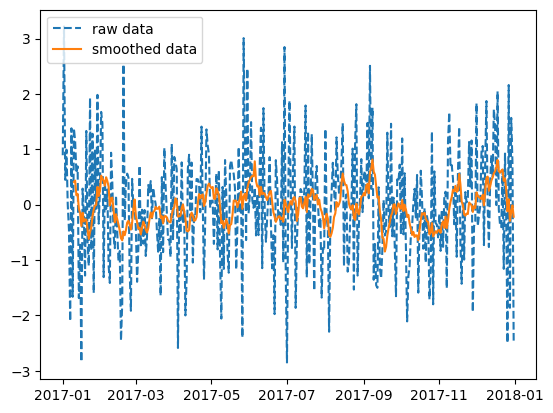

In [55]:
import matplotlib.pyplot as plt

plt.plot(ser, '--', label='raw data')
ser_window = ser.rolling(window=10).mean()
plt.plot(ser_window, label='smoothed data')  # 平滑之后
plt.legend(loc='upper left')

# 参考来源
1. [How to handle time series data with ease](https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html?highlight=datetime)
2. [时间序列总结](https://mp.weixin.qq.com/s/crNLs-sn95RUP4ViDkzvqA)